In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
data = df[features]
label = np.log(df["price"])

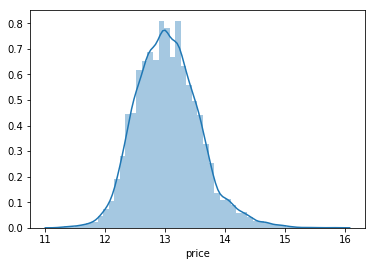

In [48]:
sns.distplot(label)

In [49]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
features = list(data.columns) # we want to use all the information
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=4)

In [54]:
X_train.shape

(14480, 18)

In [55]:
X_test.shape

(7133, 18)

## Sklearn

In [ ]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import time
parameters = {'max_depth': [3, 5, 7],
             'subsample': [0.7, 0.8, 0.9],
             'max_features':[0.7, 0.8, 0.9]}
gbr   = GradientBoostingRegressor(n_estimators = 10000)
model_gbr = GridSearchCV(gbr, parameters, cv = 5, scoring="neg_mean_squared_error")

start_time = time.time()
model_gbr.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

pred = model_gbr.predict(X_test)
print(metrics.mean_squared_error(y_test, pred))

## H2O

In [56]:
# Start and connect to a local H2O cluster
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,2 hours 25 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,"14 days, 14 hours and 11 minutes"
H2O cluster name:,H2O_from_python_gaozhiping_m9096x
H2O cluster total nodes:,1
H2O cluster free memory:,1.607 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [57]:
from h2o.frame import H2OFrame

data_train = pd.DataFrame(X_train, columns=features).copy()
data_train['price'] = y_train
data_train = H2OFrame(data_train)

data_test = pd.DataFrame(X_test, columns=features).copy()
data_test['price'] = [float(i) for i in y_test]
data_test = H2OFrame(data_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [58]:
from h2o.grid.grid_search import H2OGridSearch
# define the criteria for random grid search
search_criteria = {'strategy': "RandomDiscrete", 
                   'max_models': 9,
                   'seed': 1234}

In [59]:
# define the range of hyper-parameters for grid search
# 27 combinations in total
hyper_params = {'sample_rate': [0.7, 0.8, 0.9],
                'col_sample_rate': [0.7, 0.8, 0.9],
                'max_depth': [2,4,5,7,8,10]}

In [60]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
import time
# Set up GBM grid search
# Add a seed for reproducibility
gbm_rand_grid = H2OGridSearch(
                    H2OGradientBoostingEstimator(
                        model_id = 'gbm_rand_grid', 
                        seed = 1234,
                        ntrees = 10000,   
                        nfolds = 5,
                        stopping_metric = 'mse', 
                        stopping_rounds = 15,     
                        score_tree_interval = 1),
                    search_criteria = search_criteria, # full grid search
                    hyper_params = hyper_params)

In [61]:
# Use .train() to start the grid search
start_time = time.time()
gbm_rand_grid.train(x = features, 
                    y = 'price', 
                    training_frame = data_train)
print("--- %s seconds ---" % (time.time() - start_time))

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
--- 216.3694291114807 seconds ---


In [62]:
# Sort and show the grid search results
gbm_rand_grid_sorted = gbm_rand_grid.get_grid(sort_by='mse', decreasing=False)
#print(gbm_rand_grid_sorted)

In [63]:
# Extract the best model from random grid search
best_model_id = gbm_rand_grid_sorted.model_ids[0]
best_gbm_from_rand_grid = h2o.get_model(best_model_id)
best_gbm_from_rand_grid.summary()

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,245.0,245.0,87004.0,5.0,5.0,5.0,10.0,32.0,23.526531


In [64]:
# Check the model performance on test dataset
best_gbm_from_rand_grid.model_performance(data_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.027056429912712347
RMSE: 0.16448838838262214
MAE: 0.11736917962043872
RMSLE: 0.011798967092378534
Mean Residual Deviance: 0.027056429912712347


In [77]:
# Predict
prediction = best_gbm_from_rand_grid.predict(H2OFrame(X_test)).as_data_frame()
prediction.columns = ["h2o"]
prediction["true"] = list(y_test)
prediction["h2o_residual"] = prediction.h2o - prediction.true

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


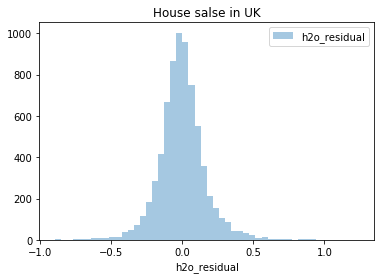

In [79]:
sns.distplot(prediction.h2o_residual,label='h2o_residual', kde=False)
plt.title("House salse in UK")
plt.legend()
plt.show()